#### *Basit bir grafik,veri analistinin zihnine diger herhangi bir cihazdan daha fazla bilgi getirir*. -John Tukey
                   

## __Python İle Veri Görselleştirme__

### __Matplotlib Kütüphanesi__
 
* Çok güçlüdür ama biraz karmaşıktır.
* Düşük seviye erişim sağlar yani yapılmak istenen işlem için daha fazla çaba harcanır.
* Python veri görselleştirme dünyasının büyükbabasıdır.

### __Pandas Kütüphanesi__
 
* Matplotlib üzerine inşa edilmiştir
* Yüksek seviyedir

### __Seaborn Kütüphanesi__

* Matplotlib üzerine inşa edilmiştir
* Yüksek seviyedir
* İstatistiksel grafikleri çok daha kolay şekilde elde etmemizi sağlar

### __ggplot Kütüphanesi__
 
* Yüksek seviyedir.
* Görselleştirme işlemini katman mantığıyla ele alıp  kullanıcıya başlangıç düzeyinden  çok ileri düzeylere kadar veri görselleştirme imkanı sağlamaktadır.

## __Bokeh Kütüphanesi__

* Seaborn ve pandas kütüphanalerinden farklı olarak matplotlib üzerine kurulu değildir.
* İnteraktif görselleştirme ktüphanesidir
* Büyük veri setlerini ve akan veri setlerini yüksek performanslı olarak interaktif olarak sunabilmektedir.

## __Plot.ly Kütüphanesi__

* Bir çok programlama dilleriyle çalışma imkanından dolayı olanak sunan bir kütüphane
* interaktif veri görselleştirme imkanı sağlar

# ___Veriye İlk Bakış___

## _Veri Seti Hikayesi ve Yapısının İncelenmesi_

In [24]:
import seaborn as sns 
planets = sns.load_dataset("planets")
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [26]:
df=planets.copy()

In [5]:
df.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [6]:
df.tail()

,method,number,orbital_period,mass,distance,year
1030,Transit,1,3.941507,NaN,172.0,2006
1031,Transit,1,2.615864,NaN,148.0,2007
1032,Transit,1,3.191524,NaN,174.0,2007
1033,Transit,1,4.125083,NaN,293.0,2008
1034,Transit,1,4.187757,NaN,260.0,2008


In [ ]:
#veri seti yapısal bilgiler

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   method          1035 non-null   object 
 1   number          1035 non-null   int64  
 2   orbital_period  992 non-null    float64
 3   mass            513 non-null    float64
 4   distance        808 non-null    float64
 5   year            1035 non-null   int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 48.6+ KB


In [27]:
df.dtypes

method             object
number              int64
orbital_period    float64
mass              float64
distance          float64
year                int64
dtype: object

In [10]:
#import pandas as pd
#df.method=pd.Categorical(df.method)
#kategoriye çevirdik 

In [11]:
df.dtypes

method            category
number               int64
orbital_period     float64
mass               float64
distance           float64
year                 int64
dtype: object

In [12]:
df.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [14]:
df.shape # gözlem ve değişken sayısına erişmek için

(1035, 6)

In [15]:
df.columns #değişken isimleri

Index(['method', 'number', 'orbital_period', 'mass', 'distance', 'year'], dtype='object')

In [16]:
df.describe().T #betimsel istatistikler(sayısal değişkenleri verir)

,count,mean,std,min,25%,50%,75%,max
number,1035.0,1.785507,1.240976,1.000000,1.00000,1.0000,2.000,7.0
orbital_period,992.0,2002.917596,26014.728304,0.090706,5.44254,39.9795,526.005,730000.0
mass,513.0,2.638161,3.818617,0.003600,0.22900,1.2600,3.040,25.0
distance,808.0,264.069282,733.116493,1.350000,32.56000,55.2500,178.500,8500.0
year,1035.0,2009.070531,3.972567,1989.000000,2007.00000,2010.0000,2012.000,2014.0


## _Eksik Değerlerin İncelenmesi_

In [17]:
#hiç eksik gözlem var mı
df.isnull().values.any() #evet var diyor

True

In [18]:
#hangi değişkende kaç adet eksik gözlem var
df.isnull().sum()

method              0
number              0
orbital_period     43
mass              522
distance          227
year                0
dtype: int64

In [ ]:
#df["degisken_ismi"].fillna(0,inplace=True)
#eksik gözlemlere 0  ile doldur

## _Kategorik Değişken Özetleri_


In [28]:
kat_df=df.select_dtypes(include=["object"])
#veri seti içerisinde ki kategorik değişkenleri çekmek istiyoruz

In [29]:
kat_df.head()

,method
0,Radial Velocity
1,Radial Velocity
2,Radial Velocity
3,Radial Velocity
4,Radial Velocity


In [30]:
#sınıfları saydırma
kat_df.method.unique()

array(['Radial Velocity', 'Imaging', 'Eclipse Timing Variations',
       'Transit', 'Astrometry', 'Transit Timing Variations',
       'Orbital Brightness Modulation', 'Microlensing', 'Pulsar Timing',
       'Pulsation Timing Variations'], dtype=object)

In [31]:
kat_df["method"].value_counts().count() #10 sınıf vardır

10

In [32]:
#her sınıftan kaçar tane var(frekanslarına erişmek)
kat_df["method"].value_counts()

Radial Velocity                  553
Transit                          397
Imaging                           38
Microlensing                      23
Eclipse Timing Variations          9
Pulsar Timing                      5
Transit Timing Variations          4
Orbital Brightness Modulation      3
Astrometry                         2
Pulsation Timing Variations        1
Name: method, dtype: int64

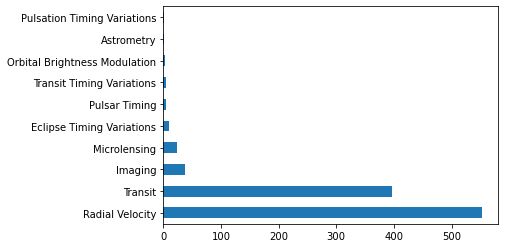

In [38]:
df["method"].value_counts().plot.barh();  #plot, pandas kutuphanesinden

## _Sürekli Değişken Özetleri_

In [39]:
df_num=df.select_dtypes(include=["float64","int64"])
df_num.head()

,number,orbital_period,mass,distance,year
0,1,269.300,7.10,77.40,2006
1,1,874.774,2.21,56.95,2008
2,1,763.000,2.60,19.84,2011
3,1,326.030,19.40,110.62,2007
4,1,516.220,10.50,119.47,2009


In [40]:
df_num.describe().T

,count,mean,std,min,25%,50%,75%,max
number,1035.0,1.785507,1.240976,1.000000,1.00000,1.0000,2.000,7.0
orbital_period,992.0,2002.917596,26014.728304,0.090706,5.44254,39.9795,526.005,730000.0
mass,513.0,2.638161,3.818617,0.003600,0.22900,1.2600,3.040,25.0
distance,808.0,264.069282,733.116493,1.350000,32.56000,55.2500,178.500,8500.0
year,1035.0,2009.070531,3.972567,1989.000000,2007.00000,2010.0000,2012.000,2014.0


In [43]:
df_num["distance"].describe()

count     808.000000
mean      264.069282
std       733.116493
min         1.350000
25%        32.560000
50%        55.250000
75%       178.500000
max      8500.000000
Name: distance, dtype: float64

Ortalama:264.06928217821786'dır'


In [48]:
print("Ortalama:{}'dır".format(df_num["distance"].mean()))
print("Dolu Gözlem Sayısı: {}'dır".format(df_num["distance"].count()))
print("Maksimum Değer: {}'dır".format(df_num["distance"].max()))
print("Minimum Değer: {}'dır".format(df_num["distance"].min()))
print("Medyan:  {}'dır".format(df_num["distance"].median()))
print("Standart Sapma: {}'dır".format(df_num["distance"].std()))

Ortalama:264.06928217821786'dır
Dolu Gözlem Sayısı: 808'dır
Maksimum Değer: 8500.0'dır
Minimum Değer: 1.35'dır
Medyan:  55.25'dır
Standart Sapma: 733.1164929404422'dır


# _Dağılım Grafikleri_

## __Barplot__

In [49]:
import seaborn as sns
diamonds = sns.load_dataset('diamonds')
df = diamonds.copy()
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


**Veri Seti Hikayesi**

* price: dolar cinsinde fiyat ($326–$18,823)

* carat: ağırlık (0.2–5.01)

* cut: kalite (Fair, Good, Very Good, Premium, Ideal)

* color: renk (from J (worst) to D (best))

* clarity: temizliği, berraklığı (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

* x: length in mm (0–10.74)

* y: width in mm (0–58.9)

* z: depth in mm (0–31.8)

* depth: toplam derinlik yüzdesi = z / mean(x, y) = 2 * z / (x + y) (43–79)

* table: elmasın en geniş noktasına göre genişliği (43–95)

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


In [51]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,53940.0,0.797940,0.474011,0.2,0.40,0.70,1.04,5.01
depth,53940.0,61.749405,1.432621,43.0,61.00,61.80,62.50,79.00
table,53940.0,57.457184,2.234491,43.0,56.00,57.00,59.00,95.00
price,53940.0,3932.799722,3989.439738,326.0,950.00,2401.00,5324.25,18823.00
x,53940.0,5.731157,1.121761,0.0,4.71,5.70,6.54,10.74
y,53940.0,5.734526,1.142135,0.0,4.72,5.71,6.54,58.90
z,53940.0,3.538734,0.705699,0.0,2.91,3.53,4.04,31.80


In [52]:
df["cut"].value_counts() #sınıf frekansları

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

In [53]:
df["color"].value_counts() #j en kötü d en iyi(ordinal)

G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64

In [54]:
#ordinal tanımlama
from pandas.api.types import CategoricalDtype

In [55]:
df.cut.head()

0      Ideal
1    Premium
2       Good
3    Premium
4       Good
Name: cut, dtype: category
Categories (5, object): ['Ideal', 'Premium', 'Very Good', 'Good', 'Fair']

In [57]:
df.cut=df.cut.astype(CategoricalDtype(ordered=True))

In [58]:
df.cut

0            Ideal
1          Premium
2             Good
3          Premium
4             Good
           ...    
53935        Ideal
53936         Good
53937    Very Good
53938      Premium
53939        Ideal
Name: cut, Length: 53940, dtype: category
Categories (5, object): ['Ideal' < 'Premium' < 'Very Good' < 'Good' < 'Fair']

In [60]:
df.cut.head(1)

0    Ideal
Name: cut, dtype: category
Categories (5, object): ['Ideal' < 'Premium' < 'Very Good' < 'Good' < 'Fair']

In [ ]:
#sıralamaya dikkat!!!

In [61]:
cut_kategoriler=["Fair", "Good", "Very Good", "Premium", "Ideal"]

In [62]:
df.cut=df.cut.astype(CategoricalDtype(categories=cut_kategoriler,ordered=True))

In [64]:
df.cut.head(1)

0    Ideal
Name: cut, dtype: category
Categories (5, object): ['Fair' < 'Good' < 'Very Good' < 'Premium' < 'Ideal']

In [ ]:
#barplor

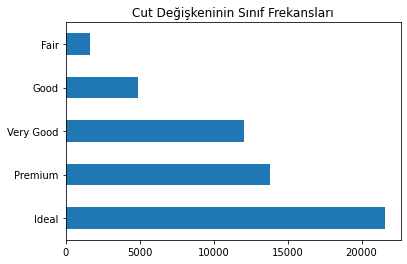

In [66]:
df["cut"].value_counts().plot.barh().set_title("Cut Değişkeninin Sınıf Frekansları");

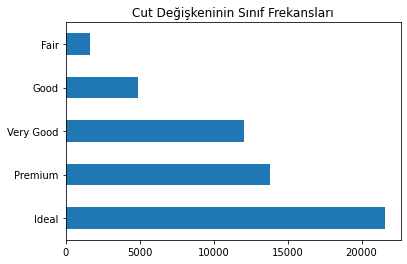

In [67]:
(df["cut"]
 .value_counts()
 .plot.barh()
 .set_title("Cut Değişkeninin Sınıf Frekansları"));

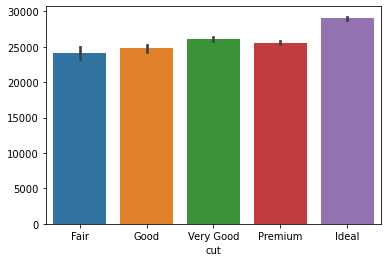

In [69]:
sns.barplot(x="cut",y=df.cut.index,data=df);

## __Çaprazlamalar__

In [71]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
#cut kategorik değişkeni ve price sayısal değişkeni çaprazlayacağız-

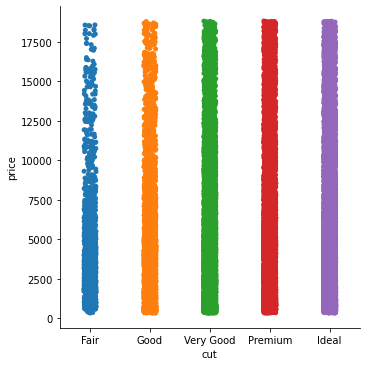

In [72]:
sns.catplot(x="cut",y="price",data=df);

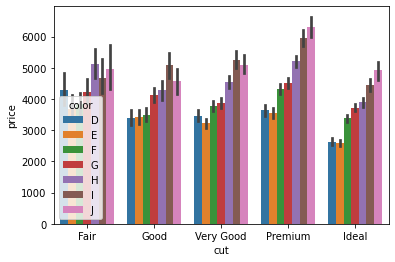

In [73]:
sns.barplot(x="cut",y="price",hue="color",data=df);

In [74]:
df.groupby(["cut","color"])["price"].mean()

cut        color
Fair       D        4291.061350
           E        3682.312500
           F        3827.003205
           G        4239.254777
           H        5135.683168
           I        4685.445714
           J        4975.655462
Good       D        3405.382175
           E        3423.644159
           F        3495.750275
           G        4123.482204
           H        4276.254986
           I        5078.532567
           J        4574.172638
Very Good  D        3470.467284
           E        3214.652083
           F        3778.820240
           G        3872.753806
           H        4535.390351
           I        5255.879568
           J        5103.513274
Premium    D        3631.292576
           E        3538.914420
           F        4324.890176
           G        4500.742134
           H        5216.706780
           I        5946.180672
           J        6294.591584
Ideal      D        2629.094566
           E        2597.550090
           F        337

## __Histogram ve Yoğunluk__

C:\Users\basak\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


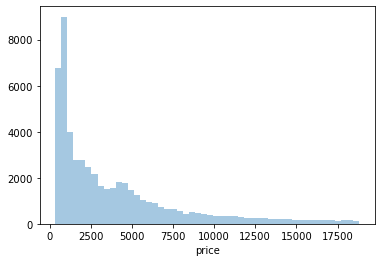

In [94]:
sns.distplot(df.price , kde = False);

In [95]:
df["price"].describe()

count    53940.000000
mean      3932.799722
std       3989.439738
min        326.000000
25%        950.000000
50%       2401.000000
75%       5324.250000
max      18823.000000
Name: price, dtype: float64

In [79]:
?sns.distplot

Signature:
sns.distplot(
    a=None,
    bins=None,
    hist=True,
    kde=True,
    rug=False,
    fit=None,
    hist_kws=None,
    kde_kws=None,
    rug_kws=None,
    fit_kws=None,
    color=None,
    vertical=False,
    norm_hist=False,
    axlabel=None,
    label=None,
    ax=None,
    x=None,
)
Docstring:
DEPRECATED: Flexibly plot a univariate distribution of observations.

.. warning::
   This function is deprecated and will be removed in a future version.
   Please adapt your code to use one of two new functions:

   - :func:`displot`, a figure-level function with a similar flexibility
     over the kind of plot to draw
   - :func:`histplot`, an axes-level function for plotting histograms,
     including with kernel density smoothing

This function combines the matplotlib ``hist`` function (with automatic
calculation of a good default bin size) with the seaborn :func:`kdeplot`
and :func:`rugplot` functions. It can also fit ``scipy.stats``
distributions and plot the estimated PDF

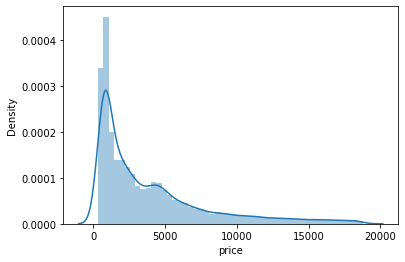

In [90]:
sns.distplot(df.price ); 

C:\Users\basak\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


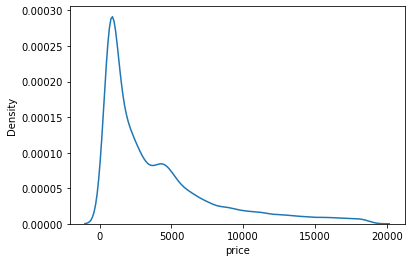

In [93]:
sns.distplot(df.price,hist=False ); 

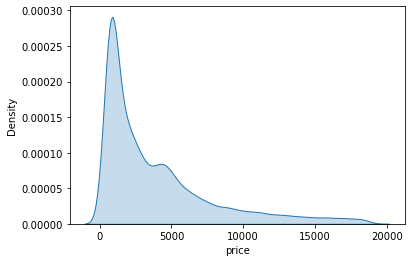

In [96]:
sns.kdeplot(df.price,shade=True);

## __Çaprazlamalar__

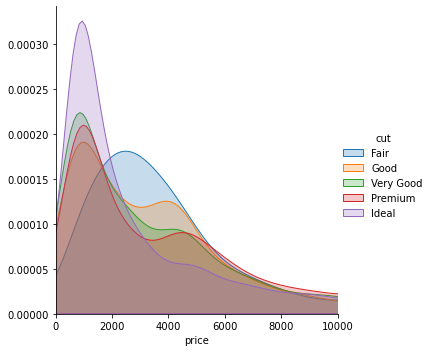

In [97]:
(sns
 .FacetGrid(df,
              hue="cut",
              height=5,
              xlim=(0,10000))
.map(sns.kdeplot,"price",shade=True)
.add_legend()
);

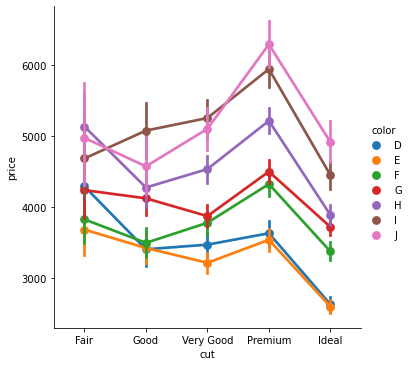

In [98]:
sns.catplot(x = "cut", y = "price", hue = "color", kind = "point", data = df);

## __Boxplot__

In [2]:
import seaborn as sns
tips = sns.load_dataset("tips")
df = tips.copy()
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### Veri Seti Hikayesi

total_bill: yemeğin toplam fiyatı (bahşiş ve vergi dahil)

tip: bahşiş

sex: ücreti ödeyen kişinin cinsiyeti (0=male, 1=female)

smoker: grupta sigara içen var mı? (0=No, 1=Yes)

day: gün (3=Thur, 4=Fri, 5=Sat, 6=Sun)

time: ne zaman? (0=Day, 1=Night)

size: grupta kaç kişi var?

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.3 KB


In [3]:
df.describe().T #sayısal değişkenler

,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,244.0,2.998279,1.383638,1.00,2.0000,2.900,3.5625,10.00
size,244.0,2.569672,0.951100,1.00,2.0000,2.000,3.0000,6.00


In [8]:
df["sex"].value_counts()

Male      157
Female     87
Name: sex, dtype: int64

In [9]:
df["smoker"].value_counts()

No     151
Yes     93
Name: smoker, dtype: int64

In [10]:
df["day"].value_counts()

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

In [11]:
df["time"].value_counts()

Dinner    176
Lunch      68
Name: time, dtype: int64

## __Boxplot__

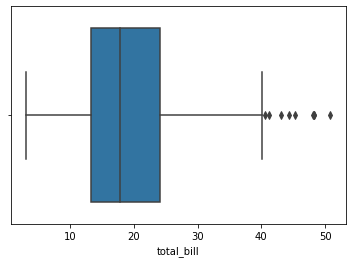

In [12]:
sns.boxplot(x = df["total_bill"]);

## __Çaprazlamalar__

In [ ]:
#hangi günler daha fazla kazanıyoruz?

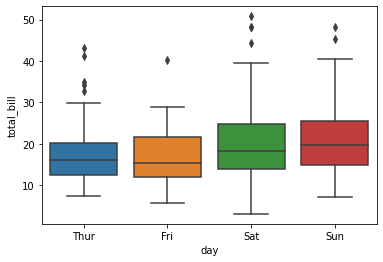

In [17]:
sns.boxplot(x = "day", y = "total_bill", data = df); #cevap sunday(pazar)

In [ ]:
#sabah mı akşam mı daha fazla kazanıyoruz?

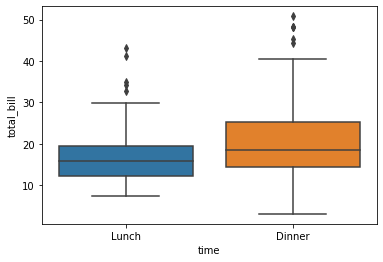

In [18]:
sns.boxplot(x = "time", y = "total_bill", data = df); #cevap akşam yemeğinde

In [ ]:
#kişi sayısı kazanç değerini etkliyor mu?

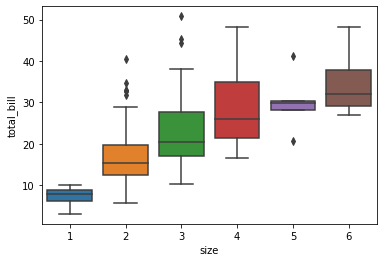

In [19]:
sns.boxplot(x = "size", y = "total_bill", data = df);

In [ ]:
#gün-cinsiyet -> kazanç etkisi

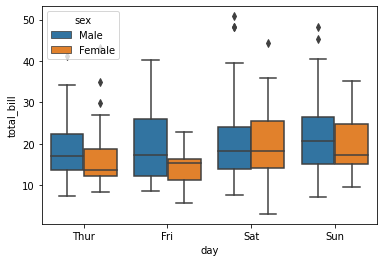

In [21]:
sns.boxplot(x = "day", y = "total_bill", hue="sex",data = df);

## __Violin__

yoğunluk ve kutu grafiğinin kesişimi gibi düşünebiliriz

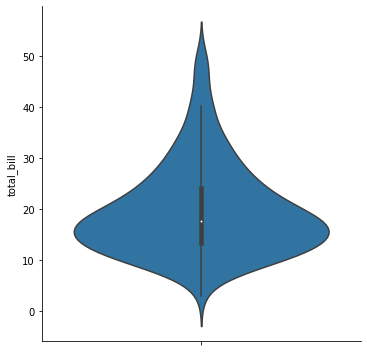

In [22]:
sns.catplot(y = "total_bill", kind = "violin", data = df);

## __Çaprazlamalar__

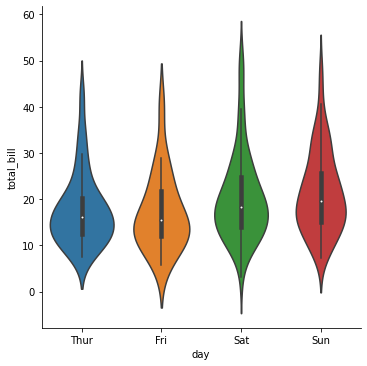

In [24]:
sns.catplot(x= "day", y = "total_bill", kind = "violin", data = df);

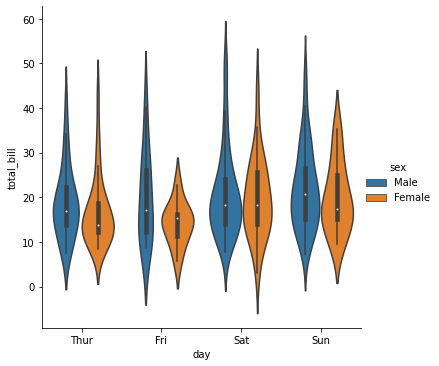

In [25]:
sns.catplot(x= "day", y = "total_bill", hue = "sex",kind = "violin", data = df);

# Korelasyon Grafikleri

* **korelasyon**:değişkenler arasındaki ilişkileri ifade eden istatistiksel terim
* iki değişken arasında ki ilişkiyi ifade etmek için kullanılan ve en çok bilinen yaklaşım scatter(saçılım) grafiği yaklaşımıdır.bu bize sayısal değişkenler arasında ki ilişkiyi gösterir.

 **Tek Değişkenli** 
* kategorik=sütun grafiği(bar)
* sürekli = histogram yoğunluk box plot ve violin grafiğidir

 **İki değişkenli**
* sürekli=scatter

## Scatterplot

In [ ]:
import seaborn as sns
tips = sns.load_dataset("tips")
df = tips.copy()
df.head()

total_bill: yemeğin toplam fiyatı (bahşiş ve vergi dahil)

tip: bahşiş

sex: ücreti ödeyen kişinin cinsiyeti (0=male, 1=female)

smoker: grupta sigara içen var mı? (0=No, 1=Yes)

day: gün (3=Thur, 4=Fri, 5=Sat, 6=Sun)

time: ne zaman? (0=Day, 1=Night)

size: grupta kaç kişi var?

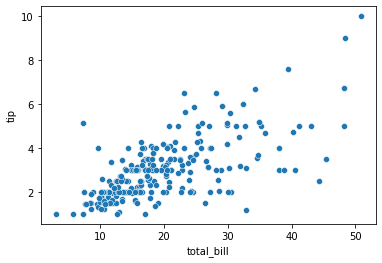

In [26]:
sns.scatterplot(x = "total_bill", y = "tip", data = df);

In [ ]:
#toplam ödenene arttıkça tiplerde artış görüyoruz

## __Çaprazlamalar__

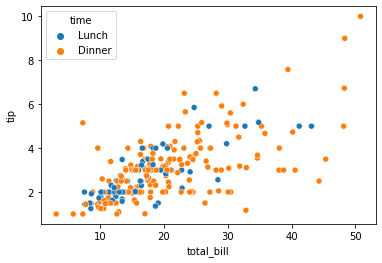

In [27]:
sns.scatterplot(x = "total_bill", y = "tip", hue = "time",data = df);

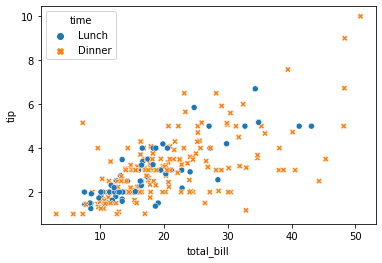

In [28]:
sns.scatterplot(x = "total_bill", y = "tip", hue = "time",data = df,style="time");

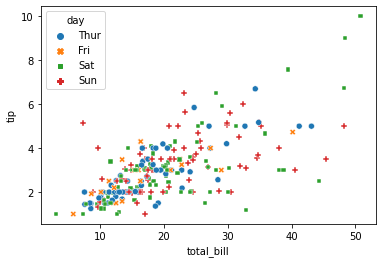

In [30]:
sns.scatterplot(x = "total_bill", y = "tip", hue = "day",data = df,style="day");

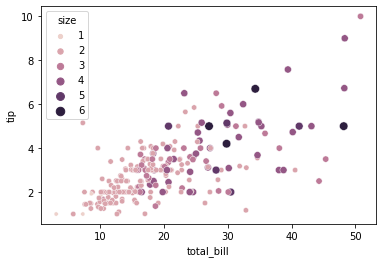

In [33]:
sns.scatterplot(x = "total_bill", y = "tip",data = df,size="size",hue="size");

## __Doğrusal İlişkinin Gösterilmesi__

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

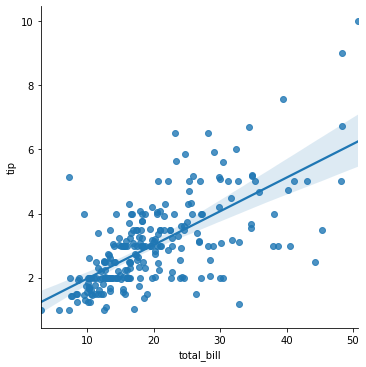

In [35]:
sns.lmplot(x = "total_bill", y = "tip", data = df);

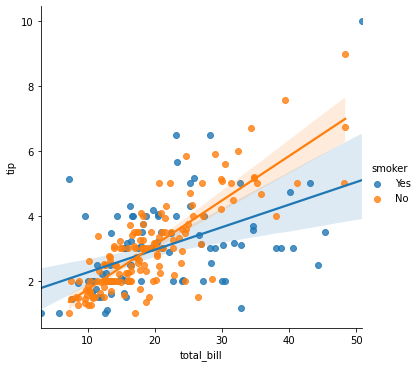

In [36]:
sns.lmplot(x = "total_bill", y = "tip", hue = "smoker", data = df);

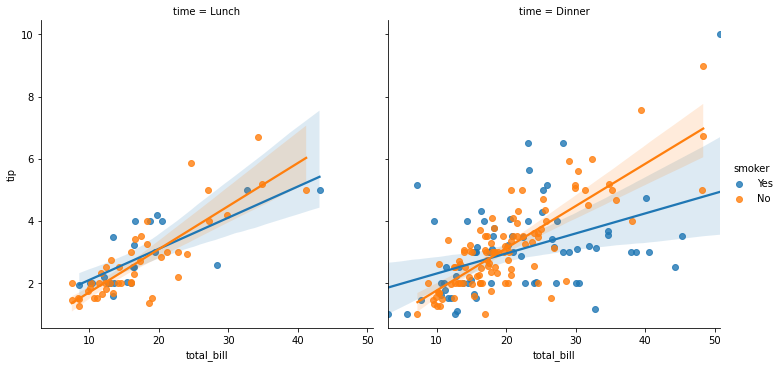

In [38]:
sns.lmplot(x = "total_bill", y = "tip",col="time" ,hue = "smoker", data = df);

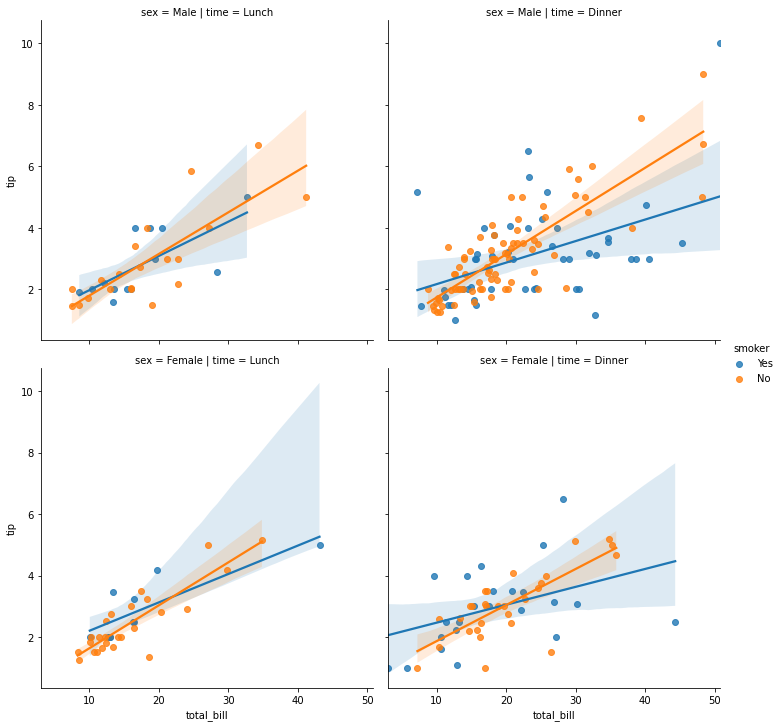

In [39]:
sns.lmplot(x = "total_bill", y = "tip",col="time" ,row="sex",hue = "smoker", data = df);

## __Scatterplot Matrisi__


In [43]:
import seaborn as sns
iris=sns.load_dataset("iris")
df=iris.copy()
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [44]:
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [45]:
df.shape

(150, 5)

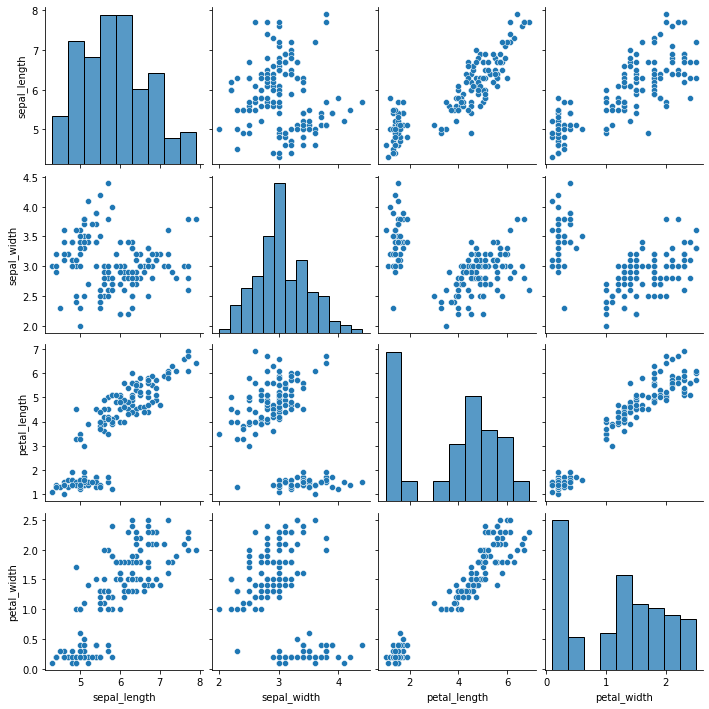

In [47]:
sns.pairplot(df);

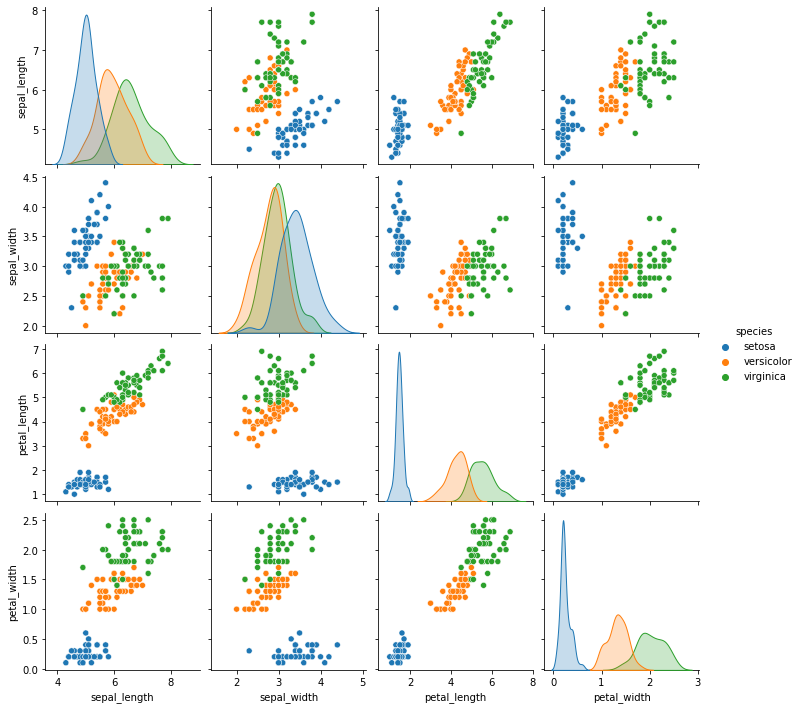

In [48]:
sns.pairplot(df,hue="species");

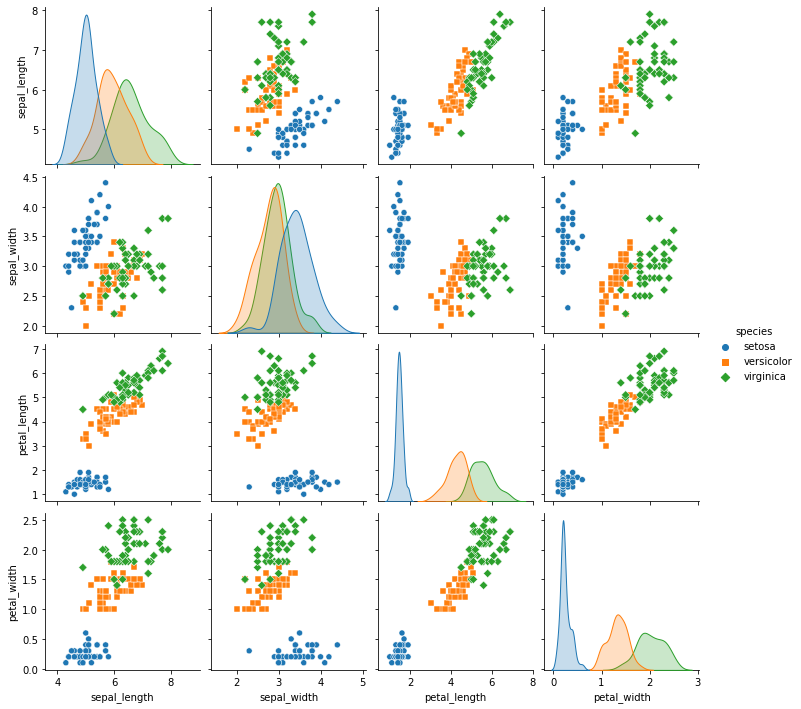

In [49]:
sns.pairplot(df,hue="species",markers=["o","s","D"]);

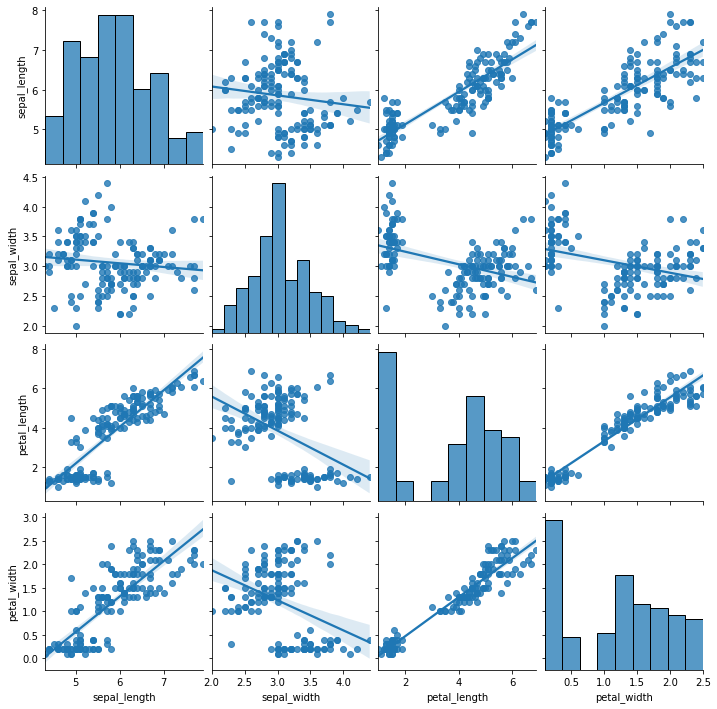

In [50]:
sns.pairplot(df,kind="reg");

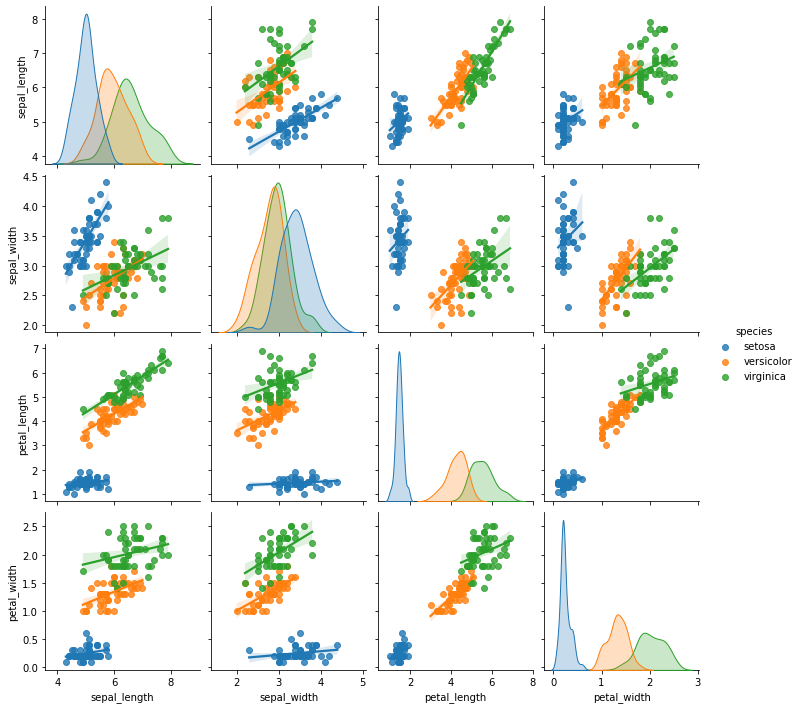

In [51]:
sns.pairplot(df,kind="reg",hue="species");

# Heatmap(Isı Haritası)
* elimizdeki değişkenleri yapısal anlamda daha geniş perspektifte görmek istediğimizde 
* uzun vadeli verilerde içerisinde zaman serileri verisi olduğunda yıl ve ay gibi  değişkenler olduğunda, bu dönemlere karşılık gözlemlenecek bazı sayısal deşken değerleri olduğunda
* Daha büyük ölçekli belirli periyotlarla tekrar eden olayları görmek istediğimizde bize çok güzel bilgiler sunan grafiktir
* sadece zamansal bağlamda  değil eğer elimizde  çok sınıflı kategorik değişken ve bunu  belirli bir sayısal  değişken açısından görselleştirme ihityacımız varsa bu durumda da çok işe yaramaktadır

In [72]:
import seaborn as sns
flights=sns.load_dataset("flights")
df=flights.copy()
df.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [74]:
df.shape

(144, 3)

In [77]:
df.columns

Index(['year', 'month', 'passengers'], dtype='object')

In [76]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,144.0,1954.500000,3.464102,1949.0,1951.75,1954.5,1957.25,1960.0
passengers,144.0,280.298611,119.966317,104.0,180.00,265.5,360.50,622.0


In [55]:
df["passengers"].describe()

count    144.000000
mean     280.298611
std      119.966317
min      104.000000
25%      180.000000
50%      265.500000
75%      360.500000
max      622.000000
Name: passengers, dtype: float64

In [79]:

df = df.pivot('month','year','passengers');
df

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


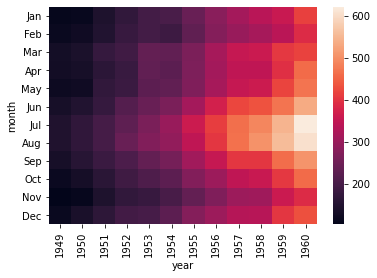

In [82]:
sns.heatmap(df);

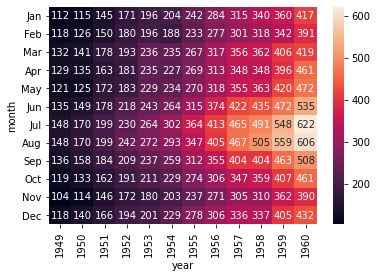

In [83]:
sns.heatmap(df, annot = True, fmt = "d");

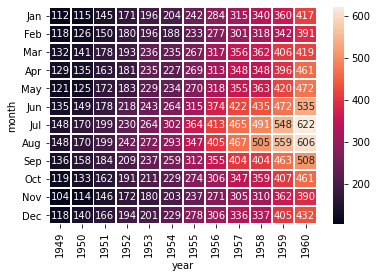

In [89]:
sns.heatmap(df, annot = True, fmt = "d", linewidths = .9);

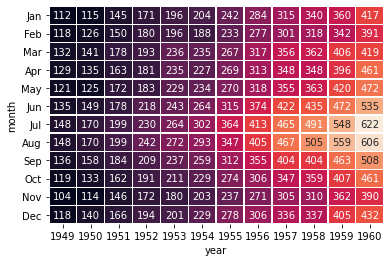

In [87]:
sns.heatmap(df, annot = True, fmt = "d", linewidths = .5, cbar = False);

# __Çizgi Grafik__

* Görece diğerlerine göre daha zor problemlerde kullanırız
* zamana bağlı değişkenlerin olduğu ver setlerinde 

In [91]:
import seaborn as sns
fmri=sns.load_dataset("fmri")
df=fmri.copy()
df.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


In [92]:
df.shape

(1064, 5)

In [93]:
df.dtypes

subject       object
timepoint      int64
event         object
region        object
signal       float64
dtype: object

In [94]:
df["timepoint"].describe()

count    1064.000000
mean        9.000000
std         5.479801
min         0.000000
25%         4.000000
50%         9.000000
75%        14.000000
max        18.000000
Name: timepoint, dtype: float64

In [95]:
df["signal"].describe()

count    1064.000000
mean        0.003540
std         0.093930
min        -0.255486
25%        -0.046070
50%        -0.013653
75%         0.024293
max         0.564985
Name: signal, dtype: float64

In [96]:
df.groupby("timepoint")["signal"].count() #her bir zaman noktasında eşit sayıda signal toplanmış

timepoint
0     56
1     56
2     56
3     56
4     56
5     56
6     56
7     56
8     56
9     56
10    56
11    56
12    56
13    56
14    56
15    56
16    56
17    56
18    56
Name: signal, dtype: int64

In [97]:
df.groupby("timepoint")["signal"].describe()

,count,mean,std,min,25%,50%,75%,max
timepoint,,,,,,,,
0,56.0,-0.016662,0.028326,-0.064454,-0.039169,-0.018382,0.003539,0.074399
1,56.0,-0.025002,0.030641,-0.082174,-0.046299,-0.024533,-0.005388,0.063558
2,56.0,-0.012873,0.035440,-0.110565,-0.034944,-0.013183,0.009318,0.077277
3,56.0,0.034446,0.058260,-0.089708,-0.001157,0.028430,0.061840,0.185581
4,56.0,0.098194,0.092838,-0.046347,0.030912,0.070166,0.144911,0.346775
5,56.0,0.137725,0.123353,-0.017946,0.042762,0.096535,0.211638,0.476055
6,56.0,0.127515,0.137332,-0.054405,0.022409,0.068850,0.218919,0.564985
7,56.0,0.075660,0.129704,-0.108222,-0.016252,0.032486,0.144781,0.494787
8,56.0,0.013420,0.104216,-0.181241,-0.049453,-0.012834,0.030396,0.337143


## Çizgi Grafik ve Çaprazlamalar

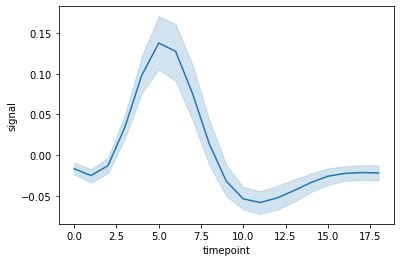

In [99]:
sns.lineplot(x="timepoint",y="signal",data=df);

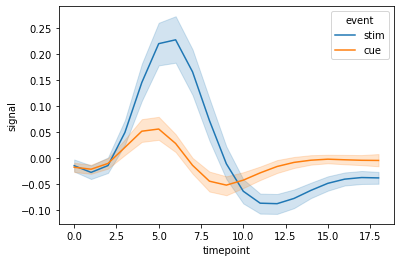

In [100]:
sns.lineplot(x="timepoint",y="signal",hue="event",data=df);

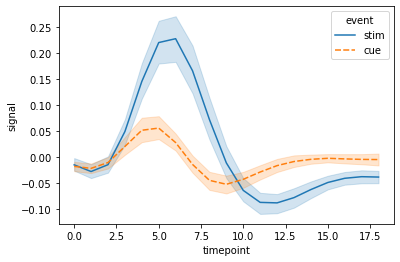

In [103]:
sns.lineplot(x="timepoint",y="signal",hue="event",style="event",data=df);

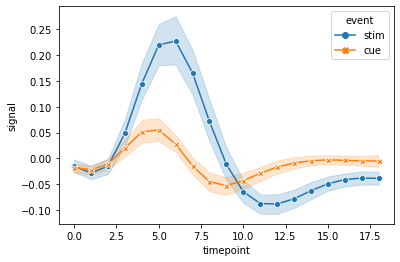

In [104]:
sns.lineplot(x="timepoint",
             y="signal",
             hue="event",
             style="event",
             markers=True,
             dashes=False,
             data=df);

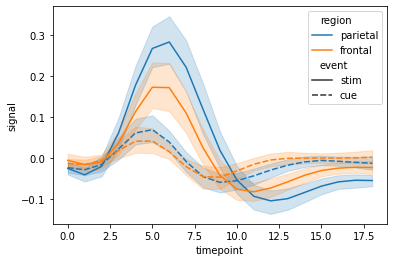

In [108]:
sns.lineplot(x="timepoint",
             y="signal",
             hue="region",
             style="event",
             data=df);

# Basit Zaman Serisi Grafiği

In [111]:
!pip install pandas_datareader
import pandas_datareader as pr

In [ ]:
# !pip install pandas_datareader #burada bu modulu anacondaya indirdik
# import  pandas_datareader as pr  #burada bu modulu aktif ettik

In [ ]:
#apple'ın borsada ki hisse senedi değerleri

In [116]:
df=pr.get_data_yahoo("AAPL",start="2016-01-01",end="2019-08-25")

In [117]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-01-04,26.342501,25.500000,25.652500,26.337500,270597600.0,24.364536
2016-01-05,26.462500,25.602501,26.437500,25.677500,223164000.0,23.753977
2016-01-06,25.592501,24.967501,25.139999,25.174999,273829600.0,23.289116
2016-01-07,25.032499,24.107500,24.670000,24.112499,324377600.0,22.306208
2016-01-08,24.777500,24.190001,24.637501,24.240000,283192000.0,22.424154


In [118]:
df.shape

(917, 6)

In [119]:
kapanis=df["Close"]

In [120]:
kapanis.head()

Date
2016-01-04    26.337500
2016-01-05    25.677500
2016-01-06    25.174999
2016-01-07    24.112499
2016-01-08    24.240000
Name: Close, dtype: float64

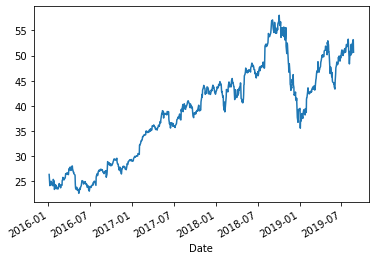

In [122]:
kapanis.plot();

In [128]:
import pandas as pd
kapanis.index=pd.DatetimeIndex(kapanis.index)

In [127]:
kapanis.head()

Date
2016-01-04    26.337500
2016-01-05    25.677500
2016-01-06    25.174999
2016-01-07    24.112499
2016-01-08    24.240000
Name: Close, dtype: float64

In [129]:
kapanis.index

DatetimeIndex(['2016-01-04', '2016-01-05', '2016-01-06', '2016-01-07',
               '2016-01-08', '2016-01-11', '2016-01-12', '2016-01-13',
               '2016-01-14', '2016-01-15',
               ...
               '2019-08-12', '2019-08-13', '2019-08-14', '2019-08-15',
               '2019-08-16', '2019-08-19', '2019-08-20', '2019-08-21',
               '2019-08-22', '2019-08-23'],
              dtype='datetime64[ns]', name='Date', length=917, freq=None)

Kaynakça : https://www.udemy.com/course/python-egitimi/